In [1]:
#Import necessary libraries

from matplotlib import rcParams
import matplotlib.pyplot as plt
import missingno as msno
import xgboost as xgb

import numpy as np
import pandas as pd

import seaborn as sns

from scipy.stats import spearmanr

%matplotlib inline
rcParams['figure.figsize'] = 10, 6
sns.set_style('darkgrid')
sns.set(font_scale=1.25)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_Accidents = pd.read_csv('Accidents0514.csv')
df_Casualties = pd.read_csv('Casualties0514.csv')
df_Vehicles = pd.read_csv('Vehicles0514.csv')

In [3]:
df_Accidents.info()
df_Accidents.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640597 entries, 0 to 1640596
Data columns (total 32 columns):
Accident_Index                                 1640597 non-null object
Location_Easting_OSGR                          1640486 non-null float64
Location_Northing_OSGR                         1640486 non-null float64
Longitude                                      1640486 non-null float64
Latitude                                       1640486 non-null float64
Police_Force                                   1640597 non-null int64
Accident_Severity                              1640597 non-null int64
Number_of_Vehicles                             1640597 non-null int64
Number_of_Casualties                           1640597 non-null int64
Date                                           1640597 non-null object
Day_of_Week                                    1640597 non-null int64
Time                                           1640464 non-null object
Local_Authority_(District)          

1640597

In [4]:
df_Casualties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216720 entries, 0 to 2216719
Data columns (total 15 columns):
Accident_Index                        object
Vehicle_Reference                     int64
Casualty_Reference                    int64
Casualty_Class                        int64
Sex_of_Casualty                       int64
Age_of_Casualty                       int64
Age_Band_of_Casualty                  int64
Casualty_Severity                     int64
Pedestrian_Location                   int64
Pedestrian_Movement                   int64
Car_Passenger                         int64
Bus_or_Coach_Passenger                int64
Pedestrian_Road_Maintenance_Worker    int64
Casualty_Type                         int64
Casualty_Home_Area_Type               int64
dtypes: int64(14), object(1)
memory usage: 253.7+ MB


In [5]:
df_Vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004425 entries, 0 to 3004424
Data columns (total 22 columns):
Accident_Index                      object
Vehicle_Reference                   int64
Vehicle_Type                        int64
Towing_and_Articulation             int64
Vehicle_Manoeuvre                   int64
Vehicle_Location-Restricted_Lane    int64
Junction_Location                   int64
Skidding_and_Overturning            int64
Hit_Object_in_Carriageway           int64
Vehicle_Leaving_Carriageway         int64
Hit_Object_off_Carriageway          int64
1st_Point_of_Impact                 int64
Was_Vehicle_Left_Hand_Drive?        int64
Journey_Purpose_of_Driver           int64
Sex_of_Driver                       int64
Age_of_Driver                       int64
Age_Band_of_Driver                  int64
Engine_Capacity_(CC)                int64
Propulsion_Code                     int64
Age_of_Vehicle                      int64
Driver_IMD_Decile                   int64
Driv

Question 1: What fraction of accidents occur in urban areas? Report the answer in decimal form?

In [6]:
df_Accidents.tail()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
1640592,2014984136414,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,...,0,0,6,3,3,0,0,2,1,NaN
1640593,2014984137514,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,...,0,0,6,1,3,0,0,2,1,NaN
1640594,2014984137714,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,...,0,0,4,1,4,0,0,2,1,NaN
1640595,2014984138414,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,...,0,0,6,2,2,0,0,2,1,NaN
1640596,2014984139614,314072.0,579971.0,-3.348426,55.106700,98,3,2,2,24/12/2014,...,0,0,1,1,2,0,0,2,1,NaN


In [7]:
df_Vehicles.tail()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
3004420,2014984138414,1,9,0,5,0,6,0,0,0,...,1,2,1,27,6,1781,1,12,6,1
3004421,2014984138414,2,19,0,18,0,1,1,4,7,...,1,2,1,44,7,1686,2,4,1,1
3004422,2014984138414,3,9,0,18,0,2,1,4,1,...,1,6,1,73,10,2143,2,-1,8,3
3004423,2014984139614,1,11,0,9,0,8,0,0,0,...,1,1,1,40,7,4500,2,4,-1,3
3004424,2014984139614,2,9,0,18,0,1,0,0,0,...,1,6,1,79,11,1398,2,11,-1,3


In [8]:
#df_Accidents['Urban_or_Rural_Area'].astype(bool).sum(axis=1)

In [9]:
#df_Accidents.groupby('Urban_or_Rural_Area').apply(lambda column: (column != 0).sum()/column.sum())

Question 2: There appears to be a linear trend in the number of accidents that occur each year. What is that trend? Return the slope in units of increased number of accidents per year.

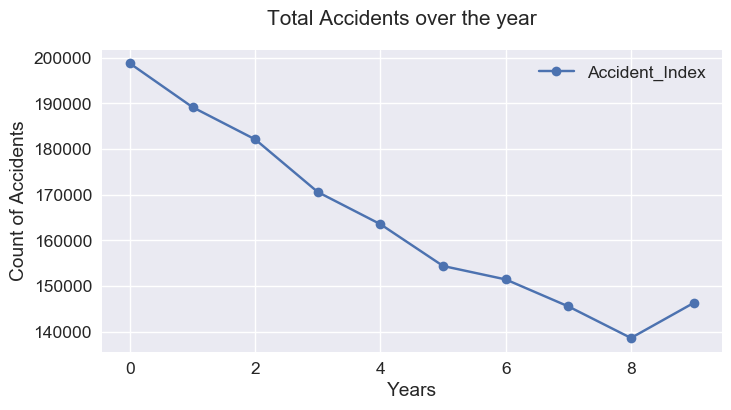

In [10]:
df_Accidents.Date = pd.to_datetime(df_Accidents.Date)

Accident_year = df_Accidents.groupby(df_Accidents.Date.dt.year)['Accident_Index'].count().reset_index()

fig= plt.figure(figsize=(8,4), dpi=100)
fig.suptitle('Total Accidents over the year', fontsize=15, label ='Accident')
plt.plot(Accident_year.Date.index,Accident_year.Accident_Index, marker ='o')
plt.xlabel ("Years")
plt.ylabel ("Count of Accidents")
plt.legend(loc='upper right')


In [11]:
from scipy.stats import linregress

linregress(Accident_year.Date.index,Accident_year.Accident_Index)


LinregressResult(slope=-6511.727272727273, intercept=193362.47272727275, rvalue=-0.9652789376903369, pvalue=6.0973204869828869e-06, stderr=623.02716264979165)

Question 3: How many times more likely are you to be in an accident where you skid, jackknife, or overturn (as opposed to an accident where you don't) when it's raining or snowing compared to nice weather with no high winds? Ignore accidents where the weather is unknown or missing?

In [12]:
df_acci_veh = pd.merge(df_Vehicles, df_Accidents, on = 'Accident_Index')

df_acci_veh = df_acci_veh[['Accident_Index', 'Weather_Conditions', 'Skidding_and_Overturning']]

df_acci_veh = df_acci_veh.drop_duplicates()


In [13]:
df_1 = df_acci_veh[(df_acci_veh['Skidding_and_Overturning'] != 0)]

df_2 = df_1[(df_1['Weather_Conditions'] == 2) | (df_1['Weather_Conditions'] == 3)]
df_3 = df_1[(df_1['Weather_Conditions'] == 1) ]


In [14]:
(len(df_2)/len(df_acci_veh))/(len(df_3)/len(df_acci_veh))

0.26849582978205283

Question 4: When is the most dangerous time to drive? Find the hour of the day that has the highest occurence of fatal accidents, normalized by the total number of accidents that occured in that hour. For your answer, submit the corresponding frequency of fatal accidents to all accidents in that hour. Note: round accident times down. For example, if an accident occured at 23:55 it occured in hour 23.

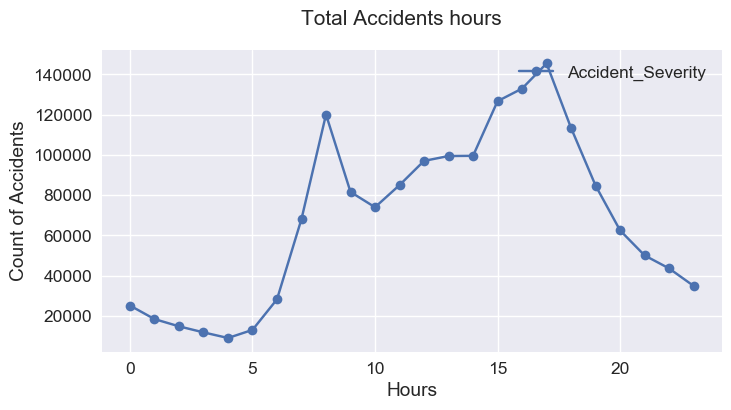

In [15]:
df_Accidents.Time = pd.to_datetime(df_Accidents.Time)

Accident_hour = df_Accidents.groupby(df_Accidents.Time.dt.hour)['Accident_Severity'].count().reset_index()

fig= plt.figure(figsize=(8,4), dpi=100)
fig.suptitle('Total Accidents hours', fontsize=15, label ='Accident')
plt.plot(Accident_hour.Time.index, Accident_hour.Accident_Severity, marker ='o')
plt.xlabel ("Hours")
plt.ylabel ("Count of Accidents")
plt.legend(loc='upper right')

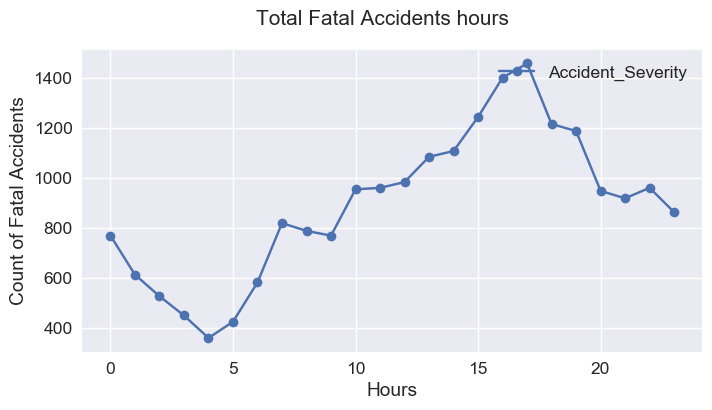

In [16]:
df_fatal = df_Accidents[(df_Accidents['Accident_Severity'] == 1)]
Accident_hour_fatal = df_fatal.groupby(df_fatal.Time.dt.hour)['Accident_Severity'].count().reset_index()

fig= plt.figure(figsize=(8,4), dpi=100)
fig.suptitle('Total Fatal Accidents hours', fontsize=15, label ='Fatal Accident')
plt.plot(Accident_hour_fatal.Time.index, Accident_hour_fatal.Accident_Severity, marker ='o')
plt.xlabel ("Hours")
plt.ylabel ("Count of Fatal Accidents")
plt.legend(loc='upper right')

In [17]:
(Accident_hour_fatal['Accident_Severity'].max())/(Accident_hour['Accident_Severity'].max())

0.010020701655444672

Question 5: Do accidents in high-speed-limit areas have more casualties? Compute the Pearson correlation coefficient between the speed limit and the ratio of the number of casualties to accidents for each speed limit. Bin the data by speed limit.

In [18]:
df_Accidents['Speed_limit'].describe()

count    1.640597e+06
mean     3.910113e+01
std      1.417775e+01
min      1.000000e+01
25%      3.000000e+01
50%      3.000000e+01
75%      5.000000e+01
max      7.000000e+01
Name: Speed_limit, dtype: float64

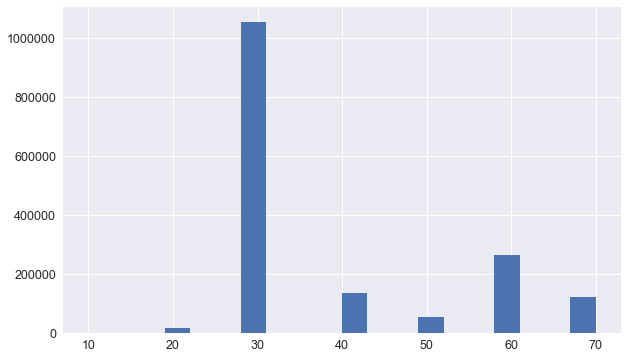

In [19]:
df_Accidents['Speed_limit'].hist(bins=20)

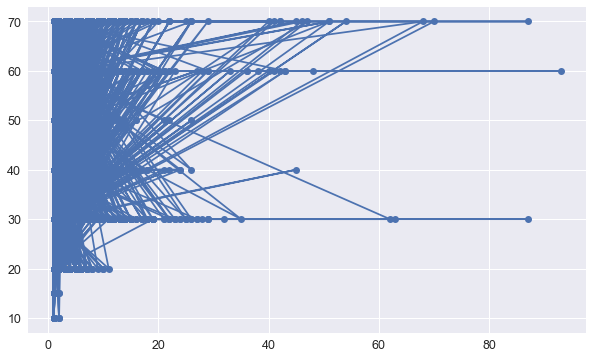

In [20]:
#fig= plt.figure(figsize=(8,4), dpi=100)
#fig.suptitle('Total Fatal Accidents hours', fontsize=15, label ='Fatal Accident')
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(df_Accidents.Number_of_Casualties, df_Accidents.Speed_limit, marker ='o')

In [21]:
df_Accidents['bin_limit'] = df_Accidents.Speed_limit - df_Accidents.Speed_limit % 10 + 5

In [22]:
s = df_Accidents[['bin_limit', 'Number_of_Casualties']].groupby('bin_limit').sum().reset_index()

In [23]:
a = df_Accidents.groupby(df_Accidents.bin_limit)['Accident_Index'].count().reset_index()

In [24]:
s_a = pd.merge(s, a, on = 'bin_limit')
s_a['cas_acci'] = s_a['Number_of_Casualties']/s_a['Accident_Index']
s_a

,bin_limit,Number_of_Casualties,Accident_Index,cas_acci
0,15,38,33,1.151515
1,25,20845,17727,1.175890
2,35,1335346,1051982,1.269362
3,45,193141,134488,1.436121
4,55,79606,52880,1.505408
5,65,399132,263282,1.515987
6,75,188612,120205,1.569086


In [25]:
s_a['bin_limit'].corr(s_a['cas_acci'], method='pearson')

0.96872028858714188

Question 6: How many times more likely are accidents involving male car drivers to be fatal compared to accidents involving female car drivers? The answer should be the ratio of fatality rates of males to females. Ignore all accidents where the driver wasn't driving a car.

In [26]:
df_fatal_sex_all = pd.merge(df_Vehicles, df_Accidents, on = 'Accident_Index')

df_fatal_sex = df_fatal_sex_all[['Accident_Index', 'Accident_Severity', 'Sex_of_Driver']]

df_fatal_sex = df_fatal_sex.drop_duplicates()

df_fatal_sex = df_fatal_sex[(df_fatal_sex['Accident_Severity'] == 1)]



In [27]:
m = len(df_fatal_sex[(df_fatal_sex['Sex_of_Driver'] == 1)])
f = len(df_fatal_sex[(df_fatal_sex['Sex_of_Driver'] == 2)])
m/f

3.3950920245398772

Question 7: How fast do the number of car accidents drop off with age? Only consider car drivers who are legally allowed to drive in the UK (17 years or older). Find the rate at which the number of accidents exponentially decays with age. Age is measured in years. Assume that the number of accidents is exponentially distributed with age for driver's over the age of 17.

[  9.34884176e+04   2.72831807e-02  -6.58065909e+03]
0.0272831806689


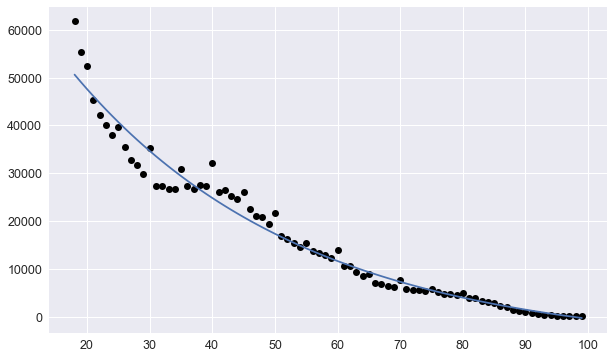

In [56]:

# Fake data
from scipy.optimize import curve_fit

df_age = df_Casualties[['Accident_Index', 'Age_of_Casualty']]
df_age = df_age[(df_age['Age_of_Casualty'] > 17)]
df_age = df_Accidents.groupby(df_age['Age_of_Casualty'])['Accident_Index'].count().reset_index()

x = np.array(df_age['Age_of_Casualty'])
y = np.array(df_age['Accident_Index'])

def func(x, a, b, c):
    return a*np.exp(-b*x) + c

popt, pcov = curve_fit(func, x, y, p0=(40000, 0.5, 100), maxfev=20000)



plt.plot(x,y,'ko')
plt.plot(x,func(x, *popt))

print(popt)
print(popt[1])


We can use the accident locations to estimate the areas of the police districts. Represent each as an ellipse with semi-axes given by a single standard deviation of the longitude and latitude. What is the area, in square kilometers, of the largest district measured in this manner?